### Import Dependencies

In [88]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

### Read US Videos CSV file

In [89]:
csv_file = "Data/USvideos.csv"
usa_df = pd.read_csv(csv_file, encoding="utf-8")
usa_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Removing Unnecessary Columns from US Videos df

In [90]:
usa_df = usa_df.drop(['video_id','thumbnail_link','ratings_disabled','video_error_or_removed','description'], axis=1)
usa_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False


### Join Path and Load US Category ID JSON file in to Python Dictionary

In [91]:
filepath = os.path.join("Data", "US_category_id.json")
with open(filepath) as jsonfile:
    video_json = json.load(jsonfile)

In [92]:
video_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

### Retrieve the item and id info from JSON array

In [93]:
data = video_json['items']
ids = data[2]['id']

snippet = data[0]['snippet']['title']


print(snippet)

Film & Animation


In [94]:
data = video_json['items']
pprint(data)

[{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Film & Animation'}},
 {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Autos & Vehicles'}},
 {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Music'}},
 {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Pets & Animals'}},

### Create an empty list and add Categories to Category List

In [95]:
cat_list = []

for x in data:

    cat_list.append(x['snippet']['title'])
    
cat_list

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

### Create an empty list and add ID to ID List

In [96]:
id_list = []
for x in data:
    #ids=data[x]['id']
    #id_list.append(ids)
    #print(x['id'])
    id_list.append(int(x['id']))
    
id_list

[1,
 2,
 10,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

## Create Category_ID DataFrame

In [97]:
cat_df = pd.DataFrame(cat_list, id_list)
cat_df

,0
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [98]:
cat_df = cat_df.reset_index()
cat_df

,index,0
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [99]:
cat_df.columns

Index(['index', 0], dtype='object')

### Rename Columns 

In [100]:
cat_df = cat_df.rename(columns={'index':'category_id', 0:'Category_name'})
cat_df

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


### Save US category dataframe into a CSV file 

In [101]:
cat_df.to_csv('US_Categories.csv')

## US Category Trending Video Graph

In [102]:
df= usa_df.join(cat_df.set_index('category_id'), on='category_id')
#df

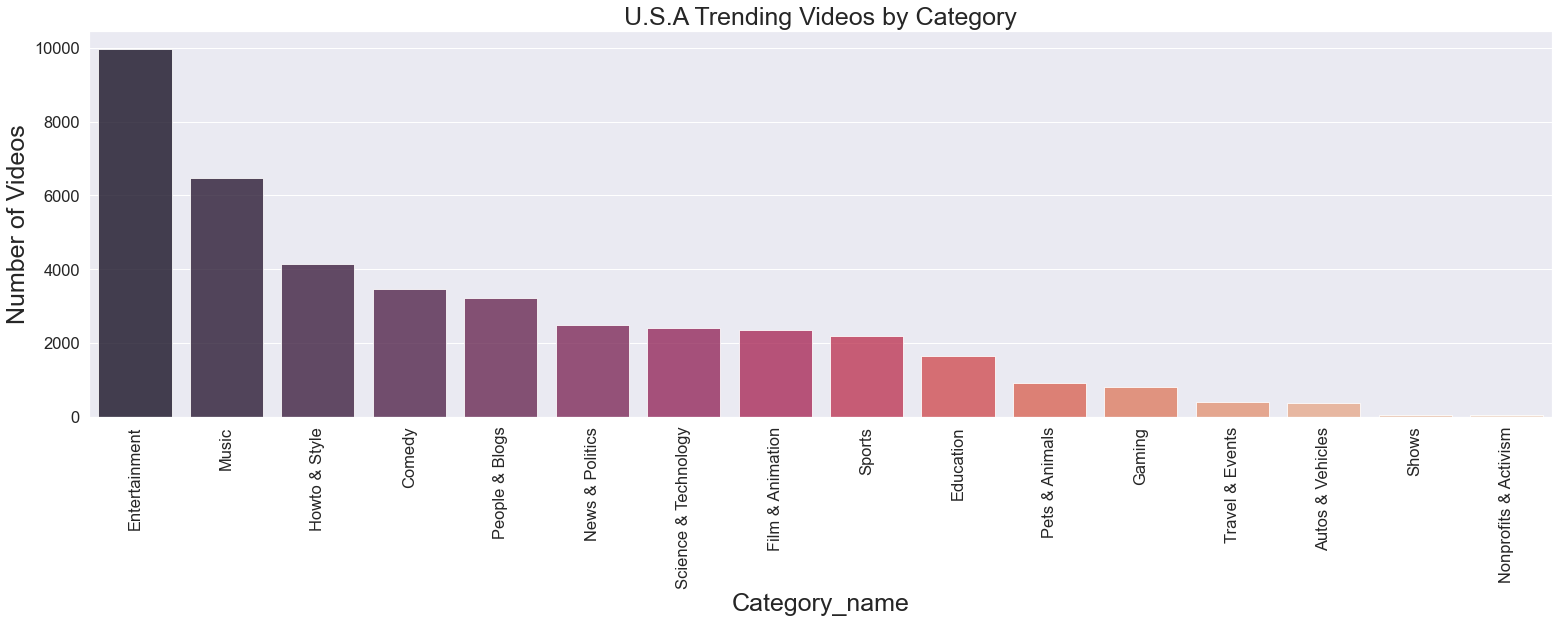

In [138]:
categories = df['Category_name'].value_counts()

# Bar graph for number of videos per category
plt.figure(figsize=(22,9))
sns.barplot(categories.index, categories.values, alpha=0.8, palette="rocket")
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.xlabel('Category_name', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('U.S.A Trending Videos by Category', fontsize=25)
plt.tight_layout()
plt.savefig('Images/us_cat_graph.png')
plt.show()

### Video's Comments Disabled  PairPlot

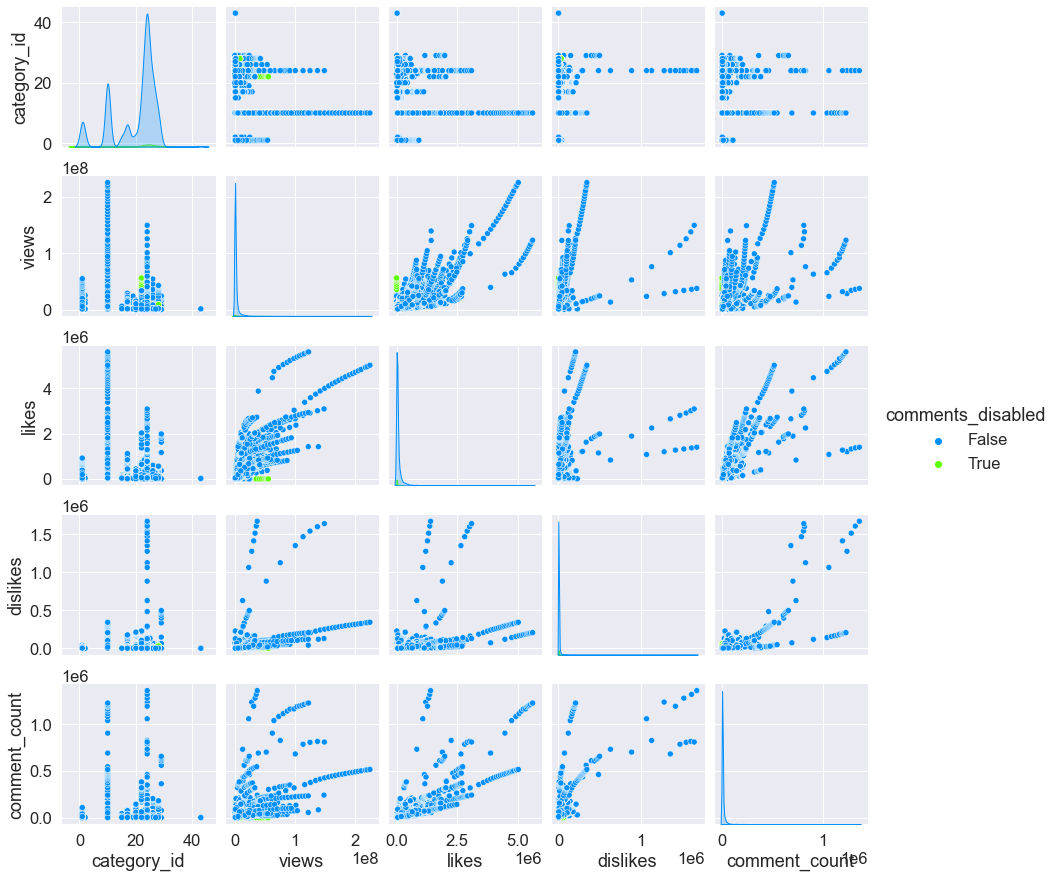

In [141]:
sns.pairplot(usa_df, hue = 'comments_disabled', palette = 'gist_rainbow_r')
plt.savefig('Images/us_comment_graph.png')

In [142]:
value_counts = usa_df['channel_title'].value_counts().to_frame()
value_counts.head(100)

,channel_title
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
Vox,193
Netflix,193
TheEllenShow,193
...,...
LaurDIY,81
Matt Stonie,81
ibighit,80
LOL Network,80


### Save/Transfer US channel dataframe into a CSV file 

In [143]:
value_counts.to_csv('US_Channel_Counts.csv')

### Save/Transfer clean & organized USA dataframe into a CSV file

In [144]:
usa_df.to_csv('CleanUSAVideos.csv')

-------
 ## Data Cleaning and Transfer Done! Below steps were for our own curiosity
-------

In [145]:
#Assign numbers text value
#categories_df = pd.DataFrame(cat_list, id_list)
#categories_df

In [146]:
#categories_df = categories_df.reset_index()
#categories_df

In [147]:
#categories_df.columns

In [148]:
#categories_df = categories_df.rename(columns={'index':'category_id', 0:'Category'})
#categories_df

In [149]:
#categories_df.to_csv('USCategories.csv')

In [150]:
politics = usa_df.loc[usa_df['category_id']==25]
politics

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
9,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,False
13,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12T14:00:00.000Z,"nowthis|""nowthis world""|""world news""|""nowthis ...",544770,7848,1171,3981,False
28,17.14.11,LeBron James admits he was ripping Phil Jackso...,Cleveland Cavaliers on cleveland.com,25,2017-11-13T15:42:28.000Z,auth-jvardon-auth,27943,156,36,83,False
41,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,False
51,17.14.11,Lin-Manuel Miranda's next act: Helping rebuild...,CBS Sunday Morning,25,2017-11-12T15:05:55.000Z,"CBS Sunday Morning|""CBS News""|""news""|""On The R...",6473,205,6,15,False
...,...,...,...,...,...,...,...,...,...,...,...
40394,18.12.06,Why 350°F is the magic number for baking,Vox,25,2018-06-07T12:00:02.000Z,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",741829,15368,618,1506,False
40583,18.13.06,Anderson Cooper’s tribute to his friend Anthon...,CNN,25,2018-06-09T00:28:37.000Z,"latest News|""Happening Now""|""CNN""|""Entertainme...",2697565,36029,2642,9266,False
40599,18.13.06,Why 350°F is the magic number for baking,Vox,25,2018-06-07T12:00:02.000Z,"baking|""maillard reaction""|""s pen""|""Vox.com""|""...",782283,15845,643,1542,False
40796,18.14.06,Anderson Cooper’s tribute to his friend Anthon...,CNN,25,2018-06-09T00:28:37.000Z,"latest News|""Happening Now""|""CNN""|""Entertainme...",2849993,37374,2762,9559,False


In [151]:
politics_df = politics.sort_values(by='views', ascending=False)
politics_df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
38748,18.03.06,Hawaiian lava flows ‘faster than a turtle’,ABC News (Australia),25,2018-05-07T22:34:57.000Z,"Australia|""Kilauea""|""Hawai'i""|""Hawaii""|""Leilan...",10277358,49782,3964,0,True
38545,18.02.06,Hawaiian lava flows ‘faster than a turtle’,ABC News (Australia),25,2018-05-07T22:34:57.000Z,"Australia|""Kilauea""|""Hawai'i""|""Hawaii""|""Leilan...",10006223,48923,3846,0,True
38343,18.01.06,Hawaiian lava flows ‘faster than a turtle’,ABC News (Australia),25,2018-05-07T22:34:57.000Z,"Australia|""Kilauea""|""Hawai'i""|""Hawaii""|""Leilan...",9913561,48648,3813,0,True
36097,18.21.05,Hawaiian lava flows ‘faster than a turtle’,ABC News (Australia),25,2018-05-07T22:34:57.000Z,"Australia|""Kilauea""|""Hawai'i""|""Hawaii""|""Leilan...",8594435,42999,3287,0,True
35875,18.20.05,Hawaiian lava flows ‘faster than a turtle’,ABC News (Australia),25,2018-05-07T22:34:57.000Z,"Australia|""Kilauea""|""Hawai'i""|""Hawaii""|""Leilan...",8509825,42637,3252,0,True
...,...,...,...,...,...,...,...,...,...,...,...
12961,18.19.01,Bannon Arrives to Testify on Capitol Hill,Associated Press,25,2018-01-16T15:16:11.000Z,"united states|""north america""|""donald trump""|""...",810,9,5,0,True
12716,18.18.01,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,25,2018-01-16T12:16:44.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",748,9,0,0,True
14782,18.28.01,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",559,9,0,4,False
14563,18.27.01,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",554,9,0,4,False


In [152]:
ap_news = politics_df.loc[politics_df['channel_title']=='Associated Press']
ap_news

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
23735,18.14.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",313708,3658,86,0,True
23537,18.13.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",279739,3210,82,0,True
23335,18.12.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",261610,2931,77,0,True
23132,18.11.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",233533,2599,67,0,True
22916,18.10.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",198611,2089,57,0,True
22706,18.09.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",168288,1758,50,0,True
22492,18.08.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",140806,1443,36,0,True
22275,18.07.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",103836,1049,29,0,True
22063,18.06.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",64455,681,14,100,False
21841,18.05.03,Rescued Chimp Helps Out on Flight over Africa,Associated Press,25,2018-03-01T16:48:11.000Z,"news|""associated press""|""ap""|""ap online""|""asso...",47587,506,11,72,False


In [153]:
cnn_news = politics_df.loc[politics_df['channel_title']=='CNN']
cnn_news

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
25902,18.25.03,Physicist Stephen Hawking has died,CNN,25,2018-03-14T04:46:28.000Z,"latest News|""Happening Now""|""CNN""|""World News""...",3523600,56317,2469,32566,False
25691,18.24.03,Physicist Stephen Hawking has died,CNN,25,2018-03-14T04:46:28.000Z,"latest News|""Happening Now""|""CNN""|""World News""...",3512790,56242,2466,32475,False
25479,18.23.03,Physicist Stephen Hawking has died,CNN,25,2018-03-14T04:46:28.000Z,"latest News|""Happening Now""|""CNN""|""World News""...",3498559,56096,2453,32409,False
25265,18.22.03,Physicist Stephen Hawking has died,CNN,25,2018-03-14T04:46:28.000Z,"latest News|""Happening Now""|""CNN""|""World News""...",3483180,55954,2440,32268,False
25053,18.21.03,Physicist Stephen Hawking has died,CNN,25,2018-03-14T04:46:28.000Z,"latest News|""Happening Now""|""CNN""|""World News""...",3461818,55771,2423,32161,False
...,...,...,...,...,...,...,...,...,...,...,...
2112,17.24.11,Celebrations in Zimbabwe after Robert Mugabe r...,CNN,25,2017-11-21T16:16:18.000Z,"latest News|""Happening Now""|""CNN""|""world news""...",28763,197,41,308,False
10441,18.05.01,Watch tie-breaking draw decide key Virginia race,CNN,25,2018-01-04T16:49:36.000Z,"latest News|""Happening Now""|""CNN""|""virginia""|""...",28664,151,293,513,False
1923,17.23.11,Celebrations in Zimbabwe after Robert Mugabe r...,CNN,25,2017-11-21T16:16:18.000Z,"latest News|""Happening Now""|""CNN""|""world news""...",27302,195,40,290,False
1673,17.22.11,Celebrations in Zimbabwe after Robert Mugabe r...,CNN,25,2017-11-21T16:16:18.000Z,"latest News|""Happening Now""|""CNN""|""world news""...",21565,168,34,266,False


In [154]:
wp_news = politics_df.loc[politics_df['channel_title']=='Washington Post']
wp_news

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
38947,18.04.06,"Breaking down 'This Is America,' Childish Gamb...",Washington Post,25,2018-05-07T19:12:46.000Z,"a:entertainment|""t:Original""|""s:Entertainment""...",8304593,70922,11172,7952,False
38742,18.03.06,"Breaking down 'This Is America,' Childish Gamb...",Washington Post,25,2018-05-07T19:12:46.000Z,"a:entertainment|""t:Original""|""s:Entertainment""...",8278934,70766,11157,7960,False
38540,18.02.06,"Breaking down 'This Is America,' Childish Gamb...",Washington Post,25,2018-05-07T19:12:46.000Z,"a:entertainment|""t:Original""|""s:Entertainment""...",8248957,70548,11129,7966,False
38338,18.01.06,"Breaking down 'This Is America,' Childish Gamb...",Washington Post,25,2018-05-07T19:12:46.000Z,"a:entertainment|""t:Original""|""s:Entertainment""...",8222911,70386,11112,7964,False
38139,18.31.05,"Breaking down 'This Is America,' Childish Gamb...",Washington Post,25,2018-05-07T19:12:46.000Z,"a:entertainment|""t:Original""|""s:Entertainment""...",8204722,70279,11100,7943,False
...,...,...,...,...,...,...,...,...,...,...,...
13158,18.20.01,4 officers hurt in shooting in South Carolina,Washington Post,25,2018-01-16T14:59:19.000Z,"Washington Post YouTube|""Washington Post Video...",10836,41,17,229,False
12936,18.19.01,4 officers hurt in shooting in South Carolina,Washington Post,25,2018-01-16T14:59:19.000Z,"Washington Post YouTube|""Washington Post Video...",10558,41,17,226,False
12685,18.18.01,4 officers hurt in shooting in South Carolina,Washington Post,25,2018-01-16T14:59:19.000Z,"Washington Post YouTube|""Washington Post Video...",10130,39,17,226,False
12460,18.17.01,4 officers hurt in shooting in South Carolina,Washington Post,25,2018-01-16T14:59:19.000Z,"Washington Post YouTube|""Washington Post Video...",9573,39,16,194,False


In [155]:
cnn_top = cnn_news['title'].unique()
cnn_top

array(['Physicist Stephen Hawking has died',
       'Anderson Cooper’s tribute to his friend Anthony Bourdain',
       "Tapper cuts off Trump adviser interview: I've wasted enough of my viewers' time",
       "30-year-old evicted from parents' home speaks to CNN",
       'Shooting survivor confronts NRA spokesperson Dana Loesch',
       'Texas school shooting suspect identified',
       'Survivor to Rubio: Will you reject NRA money?',
       "Summit of Hawaii's Kilauea volcano erupts",
       "CNN's Anthony Bourdain dead at 61",
       'Man scales building to save dangling child',
       'Hawaii residents flee after Kilauea volcano eruptions',
       'Another North Korean soldier escapes to South Korea',
       'Dozens dead after Guatemala volcano erupts',
       'Emma Gonzalez gives speech at March for Our Lives rally',
       'Trump: US, France and UK launch strikes on Syria',
       "Crowd boos as Trump calls media 'fake' in Davos",
       'Hawaii gets false missile strike alert',
 

In [156]:
wp_top = wp_news['title'].unique()
wp_top

array(["Breaking down 'This Is America,' Childish Gambino's chilling new video",
       'The FCC repeals its net neutrality rules',
       'Here’s what you missed at the 2018 Grammy Awards',
       "What we know about Amtrak's deadly South Carolina collision",
       'Live coverage and analysis of the March for Our Lives',
       'Tsunami alerts across Pacific Coast following earthquake',
       'What would a government shutdown mean?',
       "Pence sits near Kim Jong Un’s sister, doesn't applaud unified Korean Olympians",
       'Watch Rosenstein’s full announcement of the indictment of 13 Russians',
       'Watch live: Sessions testifies to the House Judiciary Committee',
       'Watch live: CIA nominee Gina Haspel testifies in Senate hearing',
       "This is how a 'bomb cyclone comes alive",
       'Live: New York police responding to reported explosion in Manhattan',
       'Watch the House floor live', 'Nikolas Cruz status hearing',
       'Trump meets with students following Fl

In [157]:
ap_top = ap_news['title'].unique()
ap_top

array(['Rescued Chimp Helps Out on Flight over Africa',
       'California Fire Forces Thousands to Evacuate',
       'Monster Storm Forecast to Move Up East Coast',
       'Sheriff: Deputy Never Entered School in Shooting',
       'CA Twins Born Minutes Apart, in Different Years',
       'Bannon Arrives to Testify on Capitol Hill',
       'Raw: 3 South Carolina Deputies, 1 Officer Shot'], dtype=object)

In [158]:
channels = politics['channel_title'].unique()
channels

array(['Vox', 'NowThis World', 'Cleveland Cavaliers on cleveland.com',
       'BBC News', 'CBS Sunday Morning', 'JimBrowski 96HourNews', 'TIME',
       'U.S. Navy', 'ABC News', 'Business Insider', 'Storyful News',
       'Chicago Sun-Times', 'KSNV News 3 Las Vegas', 'Washington Post',
       'WLKY News Louisville', 'Caters Clips', 'Rappler',
       'Sarasota Police Department', 'MassLive', 'TODAY', '60 Minutes',
       'NBC News', 'FlyFastandLow', 'USA TODAY', 'NOLA.com',
       'The Weather Channel', 'The View', 'CBS This Morning', 'YTN NEWS',
       'CNN', 'CBS Miami', 'Kanimuna Kisaka', 'Guardian News',
       'NZPoliceRecruitment', 'The White House', 'West Midlands Police',
       'AFP news agency', 'SiriusXM', 'Teen Vogue', 'The Telegraph',
       'The Royal Family Channel', 'ТСН', 'The New York Times', 'WTHR',
       'Inside Edition', 'PBS NewsHour', 'Bloomberg Politics',
       'Associated Press', 'ViralHog', 'CBS Los Angeles', 'Fox News',
       'ABC7', 'GohmertTX01', 'MSNBC', 

In [159]:
nyt_news = politics_df.loc[politics_df['channel_title']=='The New York Times']
nyt_news

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
30344,18.22.04,Who Was the YouTube Shooter? | NYT News,The New York Times,25,2018-04-04T23:00:08.000Z,"youtube shooter|""who is the youtube shooter""|""...",1822026,9202,5573,11096,False
30133,18.21.04,Who Was the YouTube Shooter? | NYT News,The New York Times,25,2018-04-04T23:00:08.000Z,"youtube shooter|""who is the youtube shooter""|""...",1816646,9181,5565,11070,False
29921,18.20.04,Who Was the YouTube Shooter? | NYT News,The New York Times,25,2018-04-04T23:00:08.000Z,"youtube shooter|""who is the youtube shooter""|""...",1811610,9168,5562,11048,False
29712,18.19.04,Who Was the YouTube Shooter? | NYT News,The New York Times,25,2018-04-04T23:00:08.000Z,"youtube shooter|""who is the youtube shooter""|""...",1806469,9153,5555,11028,False
29501,18.18.04,Who Was the YouTube Shooter? | NYT News,The New York Times,25,2018-04-04T23:00:08.000Z,"youtube shooter|""who is the youtube shooter""|""...",1800984,9129,5550,11056,False
...,...,...,...,...,...,...,...,...,...,...,...
10264,18.04.01,A Year in Bloopers: The Making of The Daily 36...,The New York Times,25,2018-01-03T02:12:08.000Z,"The New York Times|""NY Times""|""NYT""|""Times Vid...",8037,136,19,12,False
7571,17.21.12,Dance in New York City: The New Vogueing Scene,The New York Times,25,2017-12-17T15:00:03.000Z,"The New York Times|""NY Times""|""NYT""|""Times Vid...",7260,205,14,23,False
6368,17.15.12,How Trump Became a Cheerleader for Roy Moore |...,The New York Times,25,2017-12-12T03:00:01.000Z,"The New York Times|""NY Times""|""NYT""|""Times Vid...",5722,93,45,65,False
6138,17.14.12,How Trump Became a Cheerleader for Roy Moore |...,The New York Times,25,2017-12-12T03:00:01.000Z,"The New York Times|""NY Times""|""NYT""|""Times Vid...",5575,91,44,64,False


In [160]:
fox_news = politics_df.loc[politics_df['channel_title']=='Fox News']
fox_news

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
15182,18.30.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1189824,6781,1218,3630,False
14930,18.29.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1177548,6752,1206,3629,False
14699,18.28.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1164431,6729,1197,3626,False
14478,18.27.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1144929,6681,1180,3621,False
14271,18.26.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1128383,6650,1161,3598,False
14016,18.25.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1054965,6422,1108,3505,False
13803,18.24.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",795360,4989,801,2755,False
7464,17.21.12,"High-speed Amtrak train derails in DuPont, Was...",Fox News,25,2017-12-18T17:36:49.000Z,"Disasters|""Transportation""|""US Regions""|""West""...",377906,1956,796,1001,False
7231,17.20.12,"High-speed Amtrak train derails in DuPont, Was...",Fox News,25,2017-12-18T17:36:49.000Z,"Disasters|""Transportation""|""US Regions""|""West""...",366487,1920,776,989,False
7006,17.19.12,"High-speed Amtrak train derails in DuPont, Was...",Fox News,25,2017-12-18T17:36:49.000Z,"Disasters|""Transportation""|""US Regions""|""West""...",306732,1730,632,869,False


In [161]:
nyt_top = nyt_news['title'].unique()
nyt_top

array(['Who Was the YouTube Shooter? | NYT News',
       'Meet Nathan Chen, the Figure Skater Who Brought Athleticism to Artistry | NYT - Winter Olympics',
       'Jay-Z and Dean Baquet, in Conversation',
       'Watch ‘Pacific Rim Uprising’ Destroy Sydney | Anatomy of a Scene',
       '‘Shape of You’: How Ed Sheeran Made 2017’s Biggest Track',
       'Meet Chloe Kim, the Snowboarder Who Makes the Halfpipe Look Easy | NYT - Winter Olympics',
       'North Korea’s ‘Army of Beauties’ | NYT',
       'Why Is Jerusalem a Controversial Capital?',
       'The 10 Great Performers of 2017 (And Why We Chose Them)',
       'Trump Dismantles Bears Ears National Monument',
       'How Nike Designs for an N.B.A. Athlete | In the Studio',
       'Investigating Concussions in the N.F.L. | The Truth Has a Voice | The New York Times',
       'North Korea Parade Preparations Caught on Satellite | NYT',
       'This Robot Can Walk and Swim — Inside You | ScienceTake',
       'A Year in Bloopers: The Makin

In [162]:
fox_top = fox_news['title'].unique()
fox_top

array(['7.9 earthquake hits near Kodiak, AK',
       'High-speed Amtrak train derails in DuPont, Washington',
       'Heather Locklear arrested for domestic violence',
       'Police: One man dead after explosion in Stockholm',
       'Romney announces Utah Senate run',
       'Australian authorities arrest two in SUV attack',
       'After the Show Show: National Cookie Day'], dtype=object)